In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
#Load data
draft = pd.read_csv("data/basketball_draft.csv")
master = pd.read_csv("data/basketball_master.csv")
allstar = pd.read_csv("data/basketball_player_allstar.csv")

#Merge draft and master, add All-Star label
df = pd.merge(draft, master, left_on="playerID", right_on="bioID")
df['is_all_star'] = df['playerID'].isin(allstar['player_id']).astype(int)

#Select and clean relevant columns
df = df[['height', 'weight', 'draftRound', 'college', 'draftYear', 'is_all_star']]
df['draftRound'] = pd.to_numeric(df['draftRound'], errors='coerce')
df = df.dropna()

#Simplify college data to top 10 most common
top_colleges = df['college'].value_counts().nlargest(10).index
df['college_cleaned'] = df['college'].where(df['college'].isin(top_colleges), 'Other')
le = LabelEncoder()
df['college_encoded'] = le.fit_transform(df['college_cleaned'])

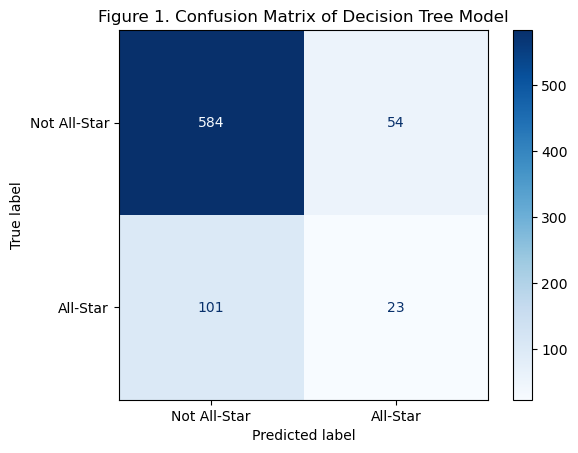

Decision Tree Accuracy: 0.7965879265091863
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       638
           1       0.30      0.19      0.23       124

    accuracy                           0.80       762
   macro avg       0.58      0.55      0.56       762
weighted avg       0.76      0.80      0.78       762



In [3]:
#Define features (X) and label (y)
X = df[['height', 'weight', 'draftRound', 'college_encoded']]
y = df['is_all_star']

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

#Plot Confusion Matrix as Figure
ConfusionMatrixDisplay.from_estimator(tree_model, X_test, y_test,
                                      display_labels=["Not All-Star", "All-Star"],
                                      cmap="Blues")
plt.title("Figure 1. Confusion Matrix of Decision Tree Model")
plt.show()

#Print Classification Report
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

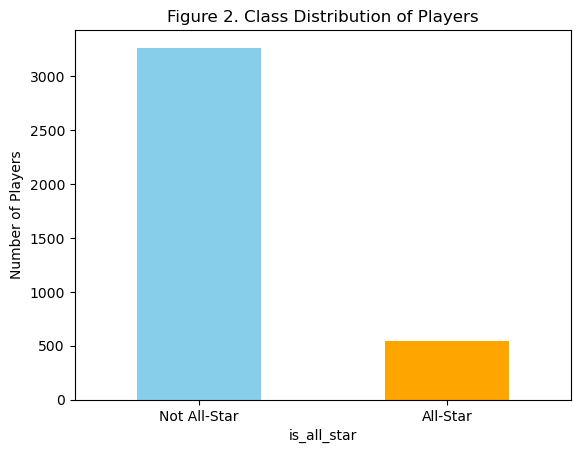

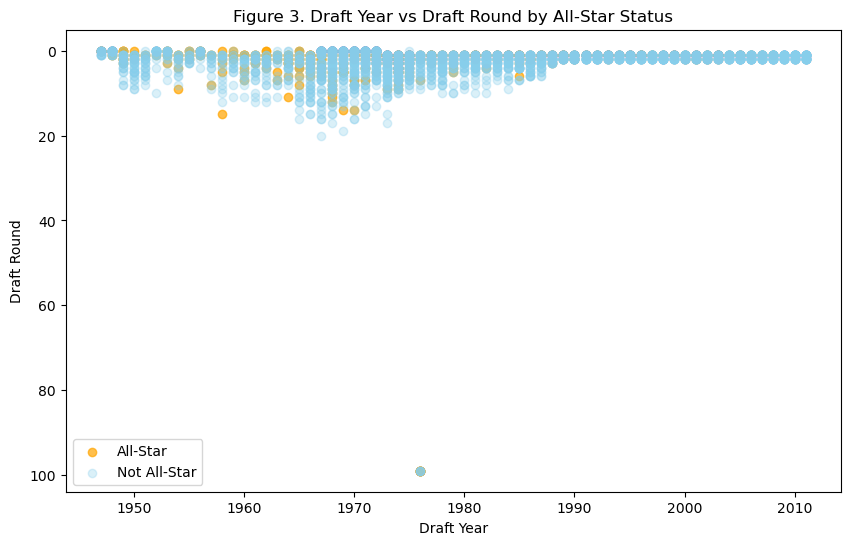

In [7]:
#Class Distribution Plot
df['is_all_star'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.xticks([0, 1], ['Not All-Star', 'All-Star'], rotation=0)
plt.title("Figure 2. Class Distribution of Players")
plt.ylabel("Number of Players")
plt.show()

#Scatterplot: Draft Year vs Round, Color by All-Star
plt.figure(figsize=(10,6))
plt.scatter(df[df['is_all_star'] == 1]['draftYear'], df[df['is_all_star'] == 1]['draftRound'], c='orange', label='All-Star', alpha=0.7)
plt.scatter(df[df['is_all_star'] == 0]['draftYear'], df[df['is_all_star'] == 0]['draftRound'], c='skyblue', label='Not All-Star', alpha=0.3)
plt.xlabel("Draft Year")
plt.ylabel("Draft Round")
plt.title("Figure 3. Draft Year vs Draft Round by All-Star Status")
plt.gca().invert_yaxis()  # Round 1 at the top
plt.legend()
plt.show()

In [8]:
#Logistic Regression + Predict Probabilities
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_prob = log_model.predict_proba(X_test)[:, 1]

#Adjust threshold from 0.5 to 0.3 to catch more All-Stars
y_pred_custom = (y_prob > 0.3).astype(int)

#Evaluation
print("Logistic Regression Accuracy (threshold = 0.3):", accuracy_score(y_test, y_pred_custom))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("Classification Report:\n", classification_report(y_test, y_pred_custom))

Logistic Regression Accuracy (threshold = 0.3): 0.8372703412073491
Confusion Matrix:
 [[638   0]
 [124   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       638
           1       0.00      0.00      0.00       124

    accuracy                           0.84       762
   macro avg       0.42      0.50      0.46       762
weighted avg       0.70      0.84      0.76       762



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
